El rendimiento respecto al Xileno es 0.6739429489608726
Tolueno salida (kmol/s) : 0.0226
Xileno salida (kmol/s) : 0.061213106387545554
Benceno salida (kmol/s) : 0.12208689361245445
Hidrógeno salida (kmol/s) : 0.4682737872249089
Metano salida (kmol/s) : 0.025073787224908904
0.0
-0.01131310638754554
0.006313106387545557
V (m3) para la conversión 0.7728643216080403 es: 1396.3524442395767


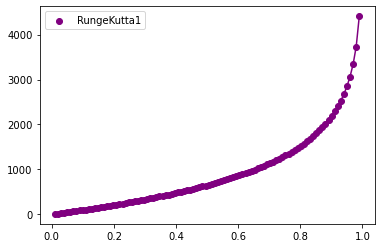

In [27]:
#------------------------------------VARIABLES MODIFICABLES------------------------------------
T=800 #K
P=30   #bar
R=0.082 #bar*m3/kmol*K  0.082 atmL/molK*1m3/1000L*1000mol/1kmol                            
FAo=0.0995 #kmol/s
FHo=6*FAo #kmol/s
FAs=0.0226 #kmol/s
porosidadlecho=0

#OBSERVACIONES:
#
# 1-
#
# 2-
# 
# 3-
# 
# 4-
#------------------------------------Condiciones iniciales-------------------------------------
Ftot=0.2059+FHo#kmol/s
Q=(Ftot*R*T)/P#m3/s
Cti=FAo/Q#kmol/m3
Chi=FHo/Q#kmol/m3
Ctf=FAs/Q#kmol/m3
#print(Cti)
#print(Ctf)
##print(Chi)


elev1=(-93800/(8.31*T))
elev2=(-148105/(8.31*T))
elevtol=(-4184/(8.31*T))

k1=5*10**(7)*(2.71828**(elev1))
#print(k1)
k2=5*10**(6)*(2.71828**(elev2))
#print(k2)
ktol=1000*(2.71828**(elevtol))
#print(ktol)

#-----------------------------RendimientoIIntegración numérica---------------------------------
#rend=dCxil/dCtol
#rend=(-1/Delta(Ctol))*Integral(rend*dCtol)
#Rendimiento global en flujo piston: Hay que resolver la integral de forma numérica

from scipy.integrate import quad

# function we want to integrate
def f(z):
    #Asunción: Concentración de hidrógeno permanece constante.
    return (((k1*(z*R*T)**2)/(1+(ktol)*z*R*T))/3600/(((k1*(z*R*T)**2)/(1+(ktol)*z*R*T))/3600+k2*z*(Chi)**0.5))

# call quad to integrate f with the integration limits

res, err = quad(f, Cti, Ctf)
#print(res)

#print("El resultado de la integración numérica es: {:f} (+-{:g})".format(res, err))

#Rendimiento global en flujo piston:

REND=(-1/(Cti-Ctf))*res #REND= todo el Xileno formado/todo el tolueno reaccionado

#¿¿¿COMO AFECTA EL COEFICIENTE ESTEQUIOMETRICO AL RENDIMIENTO???

print(f'El rendimiento respecto al Xileno es {REND}')
FTol=FAs
FXilen=0.0353+0.5*REND*(FAo-FAs)
FBenz=0.0711+0.5*REND*(FAo-FAs)+(FAo-FAs)-REND*(FAo-FAs)
FH2=FHo-(FAo-FAs)-REND*(FAo-FAs)
FCH4=(FAo-FAs)-REND*(FAo-FAs)

print(f'Tolueno salida (kmol/s) : {FTol}')
print(f'Xileno salida (kmol/s) : {FXilen}')
print(f'Benceno salida (kmol/s) : {FBenz}')
print(f'Hidrógeno salida (kmol/s) : {FH2}')
print(f'Metano salida (kmol/s) : {FCH4}')
print(FTol-0.0226)
print(FBenz-0.1334)
print(FXilen-0.0549)


#----------------------------------------Runge Kutta 4-----------------------------------------
# A sample differential equation "dV / dx = f(X)"

def dydx(x, y):
    return (FAo/(((k1*(Cti*(1-x)*R*T)**2)/(1+ktol*Cti*(1-x)*R*T))/3600+k2*Cti*(1-x)*(Chi-Cti*x)**0.5))
 
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h):
    # Count number of iterations using step size or
    # step height h
    n = (int)((x - x0)/h)
    # Iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)
 
        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        # Update next value of x
        x0 = x0 + h
    return y
 
# Driver method
x0 = 0
y0 = 0
x = (FAo-FAs)/FAo
h = 0.0001
s=(FAo-FAs)/FAo
print (f'V (m3) para la conversión {s} es:', rungeKutta(x0, y0, x, h))

#-------------------------------------Representación-------------------------------------------
import numpy as np
x = np.linspace(0.01,0.99,100)
y = [rungeKutta(x0, y0, xa, h) for xa in x]
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x, y,c='purple',label="RungeKutta1")
plt.plot(x,y,c='purple')
plt.legend()